In [1]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Conv2D, MaxPooling2D, Input, Activation
from keras.layers import Add, Flatten, AveragePooling2D, Dense, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
import time

Using TensorFlow backend.


In [4]:
#set wifth and heigt of the input
w = 32
h = 32
#set the number of epochs
epochs = 10

#open log file to dump progress data
f = open('log_flickr_resnet_32x32.txt','w')

In [5]:
def res_layer(input_layer):
    L1 = Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    L2 = Conv2D(64, (3, 3), padding='same', activation='relu')(L1)
    L3 = Conv2D(64, (3, 3), padding='same', activation='relu')(L2)
    L4 = Conv2D(64, (3, 3), padding='same', activation='relu')(L3)
    L5 = Add()([L4, input_layer])
    return L5

In [6]:
main_input = Input(shape=(32,32,3))
L1 = Conv2D(64, (7, 7), strides=(2,2), padding='same', activation='relu')(main_input)
L2 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(L1)

L3 = res_layer(L2)
L4 = res_layer(L3)
L5 = res_layer(L4)

L6 = AveragePooling2D(pool_size=(2,2))(L5)
L7 = Flatten()(L6)
L8 = Dense(10,activation='softmax')(L7)

In [7]:
model = Model(main_input, L8)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 7, 7, 64)     0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 64)     36928       max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_3 (

In [8]:
base_path = '/floyd/input/flickrdataset'
train_dir = base_path+'/train/'
validation_dir = base_path+'/validation/'
test_dir = base_path+'/test/'

In [9]:
#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), 
        batch_size=20, 
        class_mode='categorical')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [10]:
sgd = optimizers.SGD(lr=0.01, decay=5e-4, momentum=0.9, nesterov=True)
#model.compile(optimizer=optimizers.SGD(lr=1e-4),
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 16s 159ms/step - loss: 2.2299 - acc: 0.1820 - val_loss: 2.1086 - val_acc: 0.3200
Epoch 2/10
100/100 [==============================] - 13s 132ms/step - loss: 1.9359 - acc: 0.3310 - val_loss: 1.9384 - val_acc: 0.3650
Epoch 3/10
100/100 [==============================] - 13s 131ms/step - loss: 1.7026 - acc: 0.4055 - val_loss: 1.9104 - val_acc: 0.3800
Epoch 4/10
100/100 [==============================] - 13s 132ms/step - loss: 1.4953 - acc: 0.4940 - val_loss: 1.9322 - val_acc: 0.3600
Epoch 5/10
100/100 [==============================] - 13s 130ms/step - loss: 1.3599 - acc: 0.5350 - val_loss: 1.9103 - val_acc: 0.3850
Epoch 6/10
100/100 [==============================] - 13s 132ms/step - loss: 1.2198 - acc: 0.5770 - val_loss: 2.0600 - val_acc: 0.3800
Epoch 7/10
100/100 [==============================] - 13s 131ms/step - loss: 1.0656 - acc: 0.6135 - val_loss: 2.0663 - val_acc: 0.3700
Epoch 8/10
100/100 [==============================] - 1

[0.1820000021904707, 0.3310000007599592, 0.4054999993741512, 0.4940000015497208, 0.5350000005960465, 0.5770000022649765, 0.6135000002384186, 0.6604999992251396, 0.7180000001192093, 0.7675000023841858]


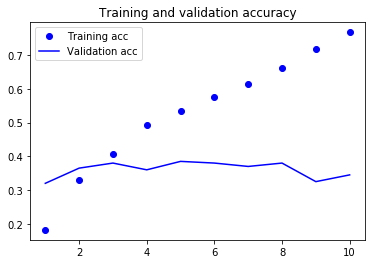

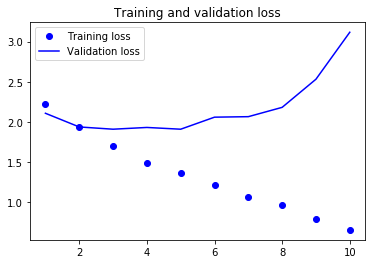

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc)
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator)

Found 200 images belonging to 10 classes.


In [13]:
print(test_loss, test_acc)

2.566187620162964 0.4150000035762787
